# EA Movie Recommendation Predict
JM3

<a id="cont"></a>

## Table of Contents


<a href=#one>1. Introduction</a>

<a href=#two>2. Importing packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Data Preprocessing</a>

<a href=#six>5. Feature Engineering</a>

<a href=#five>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Modeling</a>

<a href=#eight>8. Model Performance</a>

<a href=#nine>9. Conclusions</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

---

In today’s technology driven world, recommender systems are socially and
economically critical for ensuring that individuals can make appropriate choices
surrounding the content they engage with on a daily basis. 
 
One application where this is especially true surrounds movie content recommendations; where intelligent
algorithms can help viewers find great titles from tens of thousands of options.

With this context, we have been challenged to construct a recommendation algorithm
based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.
Providing an accurate and robust solution to this challenge has immense economic
potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

![gif](https://www.dropbox.com/scl/fi/uwat4bbydmqff5gcuynf8/palesagif.jpg?rlkey=i6knwbd41zwftc41eaa7iokhk&dl=1)

In [1]:
from comet_ml import Experiment
from comet_ml.integration.sklearn import log_model

experiment = Experiment(
  api_key="hbu6nFnbDgCuG2gKUAdO3w4D2",
  project_name="movie-prediction-system",
  workspace="gzukhanye-gmail-com"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/gzukhanye-gmail-com/movie-prediction-system/80cceb9b22784f0db59ad270294b1b79



 <a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp
import time
import ast

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(15, 8)})
%matplotlib inline
from io import BytesIO
from PIL import Image


#Wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import KNNBaseline, SVDpp, BaselineOnly, KNNWithMeans, CoClustering, SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
import heapq
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import requests
import random

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
train = pd.read_csv('train.csv') #loading training data

In [4]:
test = pd.read_csv('test.csv') #loading test data

In [5]:
movies = pd.read_csv('movies.csv')

In [6]:
genome_scores = pd.read_csv('genome_scores.csv') #loading training data

In [7]:
imdb_data = pd.read_csv('imdb_data.csv') #loading genome scores data

In [8]:
genome_tags = pd.read_csv('genome_tags.csv') #loading genome tags data

In [9]:
links = pd.read_csv('links.csv') #loading links data

In [10]:
tags = pd.read_csv('links.csv') #loading tags data

<a id="four"></a>
## 4. Data preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Descriptiion: Data processing ⚡ |
| :--------------------------- |
| In this section, the data will be preprocessed and engineered solely for exploratory data analysis and feature engineering purposes, to be later used in the modeling process |

---


Effective data preprocessing is a crucial step in any machine learning process, as it lays the foundation for meaningful exploratory data analysis and accurate modeling. By carefully preparing and cleaning the data, the data scientist can ensure that the visualizations accurately reflect the underlying patterns and trends, allowing for a deeper understanding of the data and more effective decision-making.

In this instance, the data will be preprocessed and engineered solely for exploratory data analysis and feature engineering purposes, to be later used in the modeling process.

There are 9 datasets that were provided for this project, consisting of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB.

Notes:
- Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars)
- Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
- Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.
- Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.
- Genres are a pipe-separated list.
- movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.
- imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.
- tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.
- The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

Train

In [11]:
# defining a function that will inspect each DataFrame

def df_inspect(df):
    print("Dataframe Info:")
    print(df.info())
    print("\n")
    print("Columns with Null Values:")
    print(df.isnull().sum())

In [12]:
train.head() #revealing training data

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Test

In [13]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


Movies

In [14]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [15]:
df_inspect(movies)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


Columns with Null Values:
movieId    0
title      0
genres     0
dtype: int64


Imbd

In [16]:
imdb_data

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


In [17]:
df_inspect(imdb_data)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
None


Columns with Null Values:
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


Genome tags

In [18]:
genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [19]:
df_inspect(genome_tags)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None


Columns with Null Values:
tagId    0
tag      0
dtype: int64


genome score

In [20]:
genome_scores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [21]:
df_inspect(genome_scores)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
None


Columns with Null Values:
movieId      0
tagId        0
relevance    0
dtype: int64


Links

In [22]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [23]:
df_inspect(links)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
None


Columns with Null Values:
movieId      0
imdbId       0
tmdbId     107
dtype: int64


Tags

In [24]:
tags

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [25]:
df_inspect(tags)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
None


Columns with Null Values:
movieId      0
imdbId       0
tmdbId     107
dtype: int64


In [26]:
train.shape

(10000038, 4)

In [27]:
test.shape

(5000019, 2)

<a id="five"></a>
## 5. Feature Engineering
<a class="anchor" id="5.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Feature Engineering ⚡ |
| :--------------------------- |
| In this section, we are required to clean our data and create feature for our models. |

---

for Feature engineering we did the following:
- Lower case
- Replacing nulls
- Removing pipe symbols

Lower case

In [28]:
# Converting each keyword to lowercase and append them to our corpus
plot_words = []
for keywords in imdb_data["plot_keywords"]:
    if isinstance(keywords, list):
        for word in keywords:
            cleaned_word = str(word).lower()  # Convert the keyword to lowercase
            plot_words.append(cleaned_word)

# Converting our list to a string
plot_words = " ".join(plot_words)

Replacing null values

In [29]:
links['tmdbId'].fillna(0, inplace = True)

Removing pipe symbols

In [30]:
# Defining a function that will remove the pipe symbols and return a list of strings

def split_pipe(string):
    if type(string) == str:
        return re.split("\|",string)

In [31]:
movies["genres"] = movies["genres"].apply(split_pipe)
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"


In [32]:
imdb_data["title_cast"] = imdb_data["title_cast"].apply(split_pipe)
imdb_data["plot_keywords"] = imdb_data["plot_keywords"].apply(split_pipe)
imdb_data.head(2)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"


<a id="six"></a>
## 6. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---

Exploratory data analysis (EDA) is an important step in the machine learning process because it helps to understand the characteristics of the data set and identify any potential issues or patterns. EDA helps to gain insights and understanding of the data, which can inform feature selection.

EDA also helps to ensure that the data is in a format that can be used effectively by the machine learning model, and to identify any additional data processing steps that may be needed. Overall, EDA is an essential step in machine learning as it helps to prepare the data for modeling and also helps to validate the assumptions made during the modeling process.

We looked at the following
- Users
- Ratings
- Movies
- Cast
- Directors
- plots
- Genres

**1. Users analysis**

In [33]:
unique_users = train['userId'].nunique()
print(f'unique users is; is {unique_users}')

unique users is; is 162541


In [34]:
df = train.merge(movies, on = 'movieId', how = 'left') 

Text(0, 0.5, 'UserId')

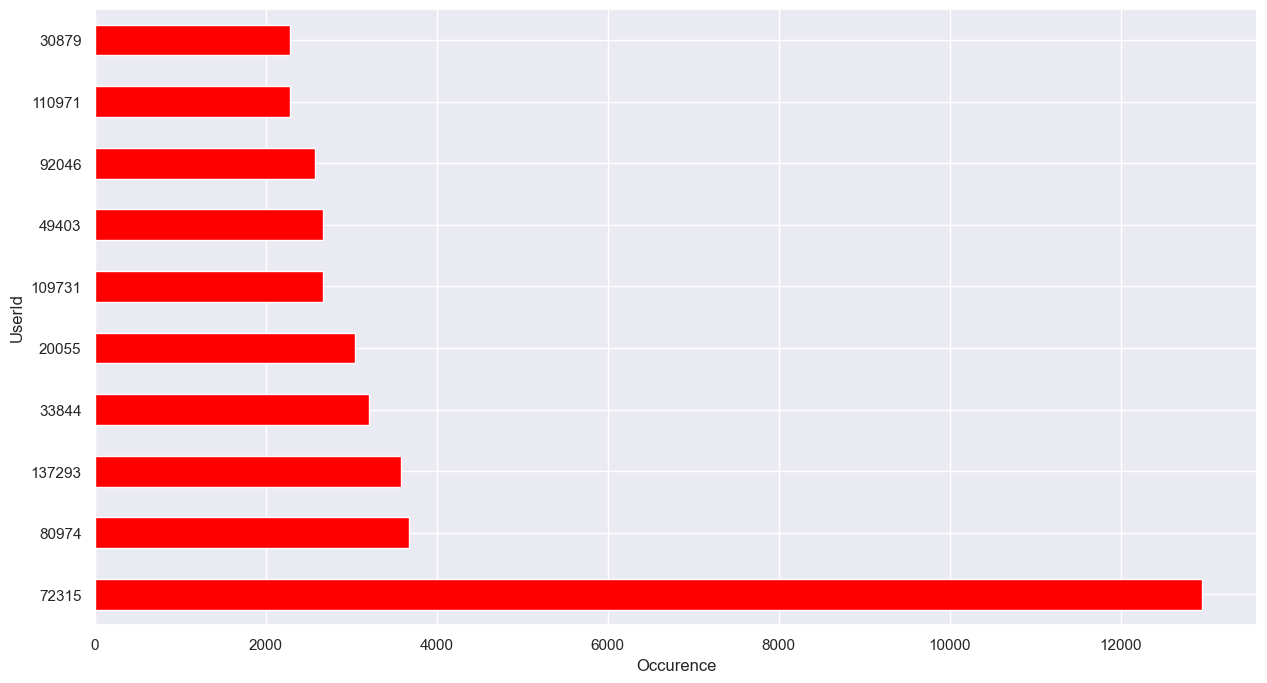

In [35]:
#who is the most active user?
df['userId'].value_counts()[:10].plot(kind = 'barh', color = 'red')
plt.xlabel('Occurence')
plt.ylabel('UserId')

**Observations:**

The most active userId is 72315, appearing 12 952 times.This user seems to be an outlier because they have more than approximately two times the number of ratings as the rest of the users.Further investigation shows that this user would be watching movies for about 6397.7 hours! 

**2. Movies** 

In [36]:
unique_movies = train['movieId'].nunique()
print(f'unique movies is; is {unique_movies}')

unique movies is; is 48213


In [37]:
#How many movies have been watched only 1 time?
watched_only_once = df['title'].value_counts()==1
print(watched_only_once.sum(),'movies have been watched once only')

12509 movies have been watched once only


Text(0.5, 1.0, '10 Most Watched Movies')

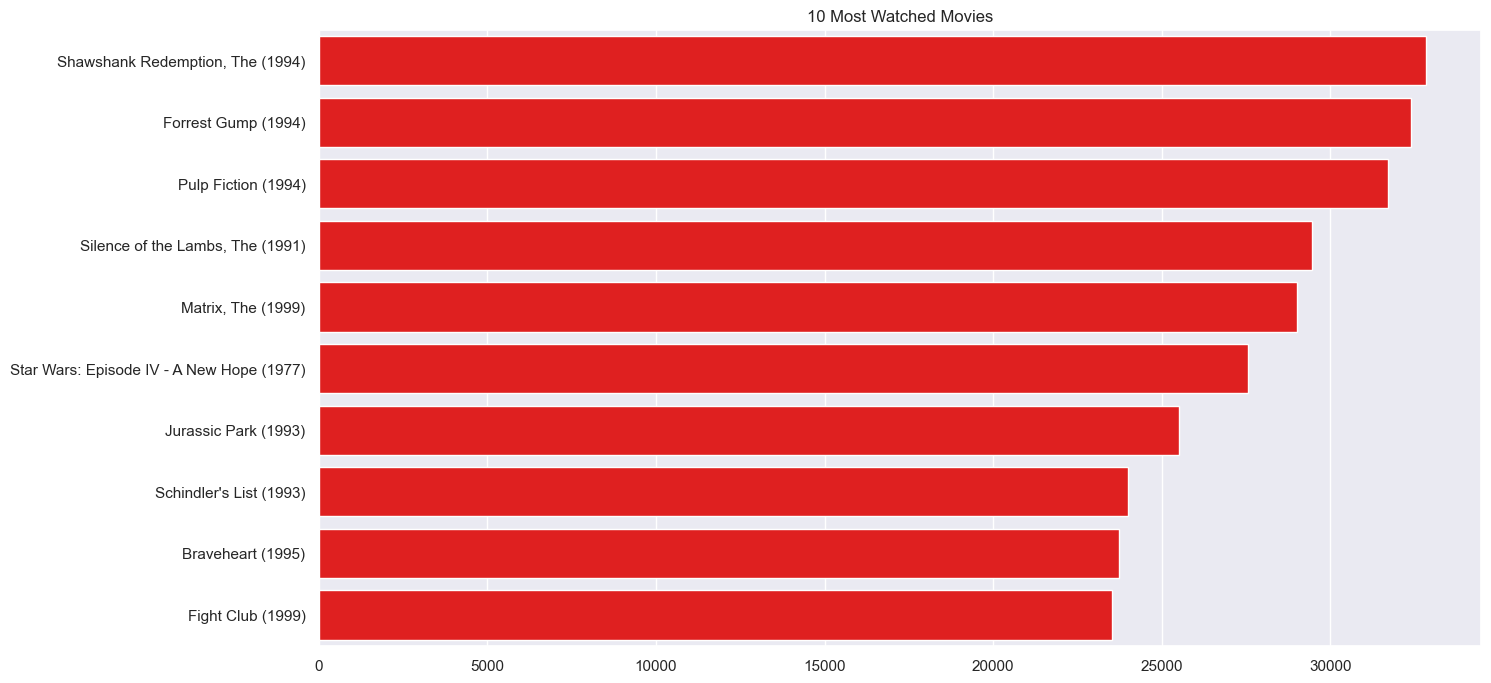

In [38]:
#Top 10 most watched movies 
movie_watched = df['title'].value_counts()[:10]
most_watched_df = pd.DataFrame(
    data = movie_watched.values, 
    index = movie_watched.index, 
    columns = ['Number of times watched'])

sns.barplot(x = movie_watched.values, 
            y = movie_watched.index, 
            data = most_watched_df, 
            color = 'red').set_title('10 Most Watched Movies')

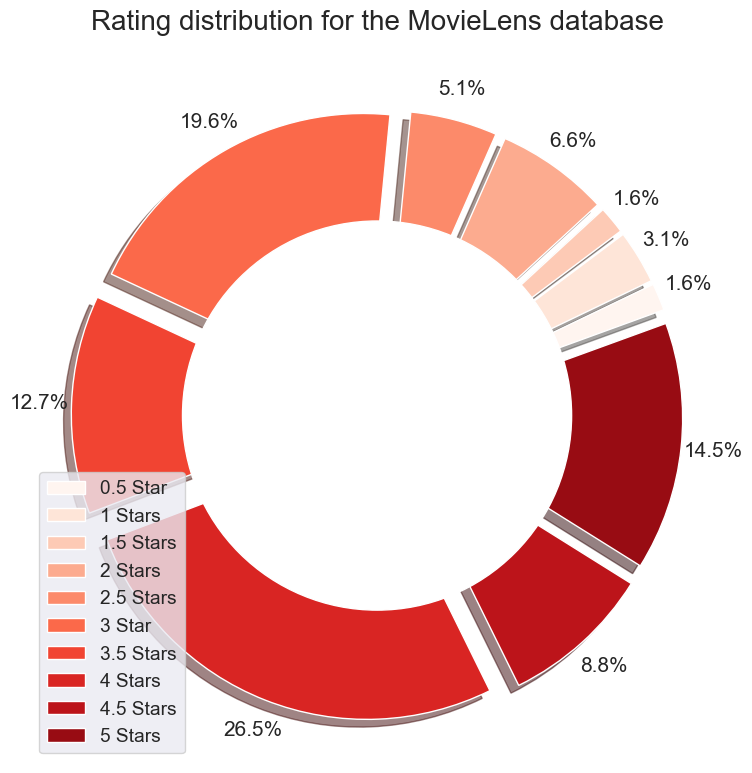

In [39]:
# Merge train with movies to join movie titles and ratings
ratings = train.merge(movies, on='movieId', how='inner')
ratings.drop('timestamp', axis=1, inplace=True)

# Count how many ratings are in each category (1 star, 2 star, ect)
grouped = pd.DataFrame(ratings.groupby(['rating'])['title'].count())
grouped.rename(columns={'title':'rating_count'}, inplace=True)

# Creating plots
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(122)

# Create colour palette
labels = ['0.5 Star', '1 Stars', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Star', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Reds')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create pie chart
pie = ax.pie(grouped['rating_count'],
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=20,
                 pctdistance=1.115,
                 explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

# Turn pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display donut plot with legend
plt.legend(pie[0], labels, loc="lower left")
ax.set_title('Rating distribution for the MovieLens database\n', fontsize=20)
plt.tight_layout()
plt.show()

**Observations:**

4 Star ratings make up the largest portion of ratings in the MovieLens dataset, accounting for 26.5% of the overall ratings.
5 star ratings make up 14.5% of the overall ratings (3rd largest portion)
0.5 star ratings account for the smallest portion of the ratings at a mere 1.6%
Ratings between 2 and 0.5 stars account for 12.9%

In [40]:
import re
# add year column to df from movie title
def get_dates_from_title(title):
    """
    Pulls the dates from the title string and returns date as an
    int.
    e.g. 
      >> title = 'Father of the Bride Part II (1995)'
      >> get_dates_from_title(title)
         1995       
    """
    date_list = re.findall(r'\((\d{4})\)', title)
    if len(date_list)>0:
        return int(date_list[-1])
    else:
        return None
    
df['year'] = df['title'].apply(get_dates_from_title)

**Distribution of average ratings**

Let's take a look at the average rating of each movie.

These stats could be misleading, though: A movie can make it to the top of the list even if only a single user has given it five stars. Normally, a movie that's really a good one gets a higher rating by a large number of users. Keeping this in mind we will record the number of ratings each film has received.

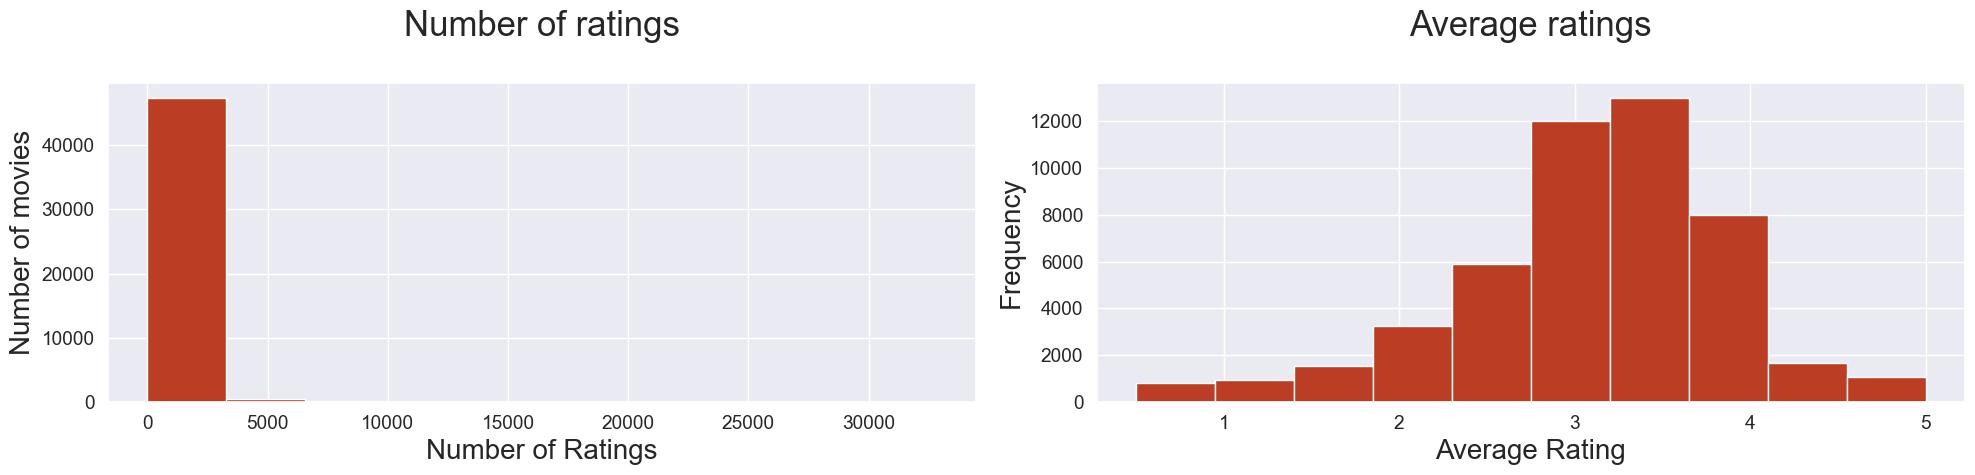

In [41]:
# Determine the average rating and number of ratings for each movie
ratings_mean_count = pd.DataFrame(ratings.groupby(['title'])[['rating']].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count())
ratings_mean_count['popularity'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count()*ratings.groupby(['title'])['rating'].mean())

# Create a plot of the number of ratings
f, axarr = plt.subplots(1,2, figsize=(20,5))
axarr[0].hist(ratings_mean_count['rating_counts'], bins=10, color='#bb3d23')
axarr[0].set_title('Number of ratings\n', fontsize=25)
axarr[0].set_xlabel('Number of Ratings', fontsize=20)
axarr[0].set_ylabel('Number of movies', fontsize=20,)

# Create a plot showing the average ratings distribution
axarr[1].hist(ratings_mean_count['rating'], bins=10, color='#bb3d23')
axarr[1].set_title('Average ratings\n', fontsize=25)
axarr[1].set_xlabel('Average Rating',fontsize=20)
axarr[1].set_ylabel('Frequency', fontsize=20)

# Display both plots
plt.tight_layout()
plt.show()

**Observations:**

 Most of the movies have received less than 2500 ratings. While the number of movies having more than 5000 ratings is very low.

The ratings follow a normal distribution that is slightly skewed to the right. It seems like users are generally generous with their ratings.

The mean rating is around 3

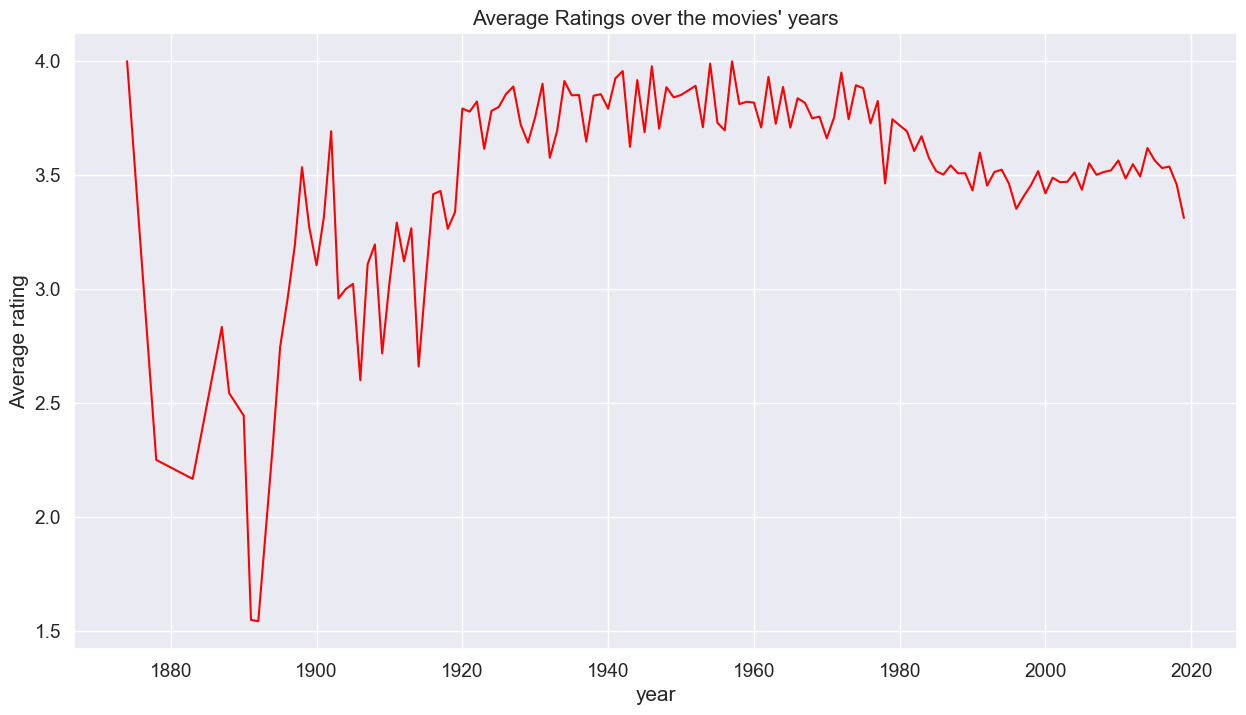

In [42]:
# Plot average ratings for each year
df_year = pd.DataFrame(df.groupby('year')['rating'].mean())
df_year['rating'].plot.line(color='red')
plt.ylabel('Average rating')
plt.title("Average Ratings over the movies' years")
plt.show()

In [43]:
#sort the ratings in the descending order of their average ratings
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(100)

title
Which Way Home (2009)                                          5.0
Kaakha Kaakha (2003)                                           5.0
Not Quite Human II (1989)                                      5.0
Selling Isobel (2018)                                          5.0
Sehar (2005)                                                   5.0
                                                              ... 
The Seasons in Quincy: Four Portraits of John Berger (2017)    5.0
Shaka Zulu: The Citadel (2001)                                 5.0
Crulic - The Path to Beyond (2011)                             5.0
Worst Friends (2014)                                           5.0
Sharpe's Siege (1996)                                          5.0
Name: rating, Length: 100, dtype: float64

**Greatest hits: most popular movies**

Popularity will be determined as the product of the average rating and the number of ratings a film has received.

In [44]:
#creating a new dataframe that contains both the average rating per movie and the number of ratings per movie.
ratings_mean_count = pd.DataFrame(df.groupby('title')['rating'].mean())

#adding the number of ratings for a movie to the ratings_mean_count dataframe
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [45]:
ratings_mean_count

,rating,rating_counts
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5
...,...,...
به نام پدر,3.250000,2
…And the Fifth Horseman Is Fear (1965),3.000000,1
チェブラーシカ (2010),2.000000,3


In [46]:
# Extract and display the 10 most popular films in the dataset
ratings_mean_count['popularity'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count()*ratings.groupby(['title'])['rating'].mean())
ratings_mean_count = ratings_mean_count.sort_values(by='popularity', ascending=False).head(15)
ratings_mean_count.head(15)

,rating,rating_counts,popularity
title,,,
"Shawshank Redemption, The (1994)",4.417624,32831,145035.0
Pulp Fiction (1994),4.195097,31697,132972.0
Forrest Gump (1994),4.047216,32383,131061.0
"Silence of the Lambs, The (1991)",4.144172,29444,122021.0
"Matrix, The (1999)",4.154253,29014,120531.5
Star Wars: Episode IV - A New Hope (1977),4.111811,27560,113321.5
Schindler's List (1993),4.247625,24004,101960.0
Fight Club (1999),4.227906,23536,99508.0
Star Wars: Episode V - The Empire Strikes Back (1980),4.146236,22956,95181.0


Text(0.5, 1.0, '10 Most Watched Movies')

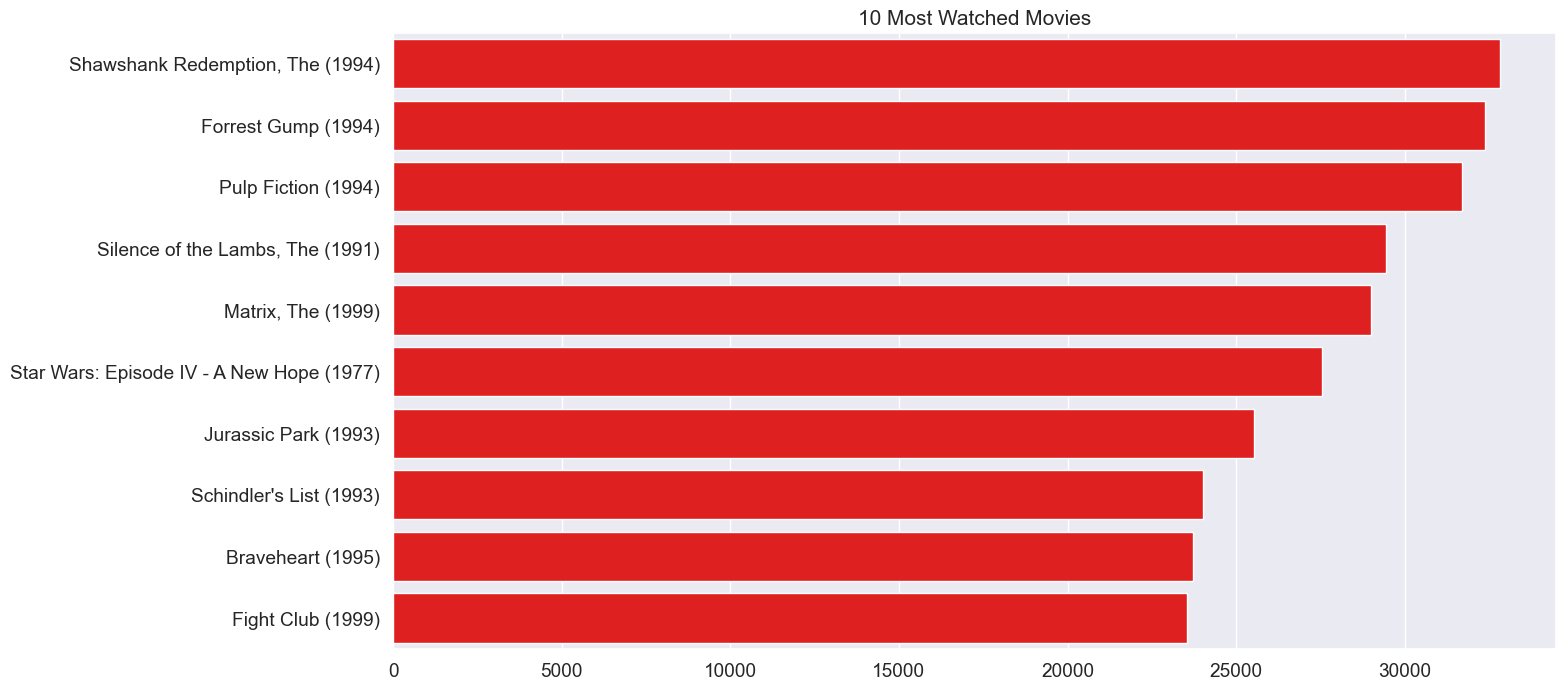

In [47]:

#Top 10 most watched movies 
ratings_mean_count= ratings_mean_count['popularity'].value_counts()[:10]
most_watched_df = pd.DataFrame(
    data = ratings_mean_count.values, 
    index = ratings_mean_count.index, 
    columns = ['Number of times watched'])

sns.barplot(x = movie_watched.values, 
            y = movie_watched.index, 
            data = most_watched_df, 
            color = 'red').set_title('10 Most Watched Movies')


**Observations:**

We see some really good movies like the Martrix, Star Wars and the Lord of the Rings in the top 15.

The above list supports our point that good movies normally receive both more and higher ratings

 An interesting thing to note is that all the movies in the top 10 are older, with none of the movies more recent than 1999.

This just could be because these movies have been around longer and have been rated more as a result

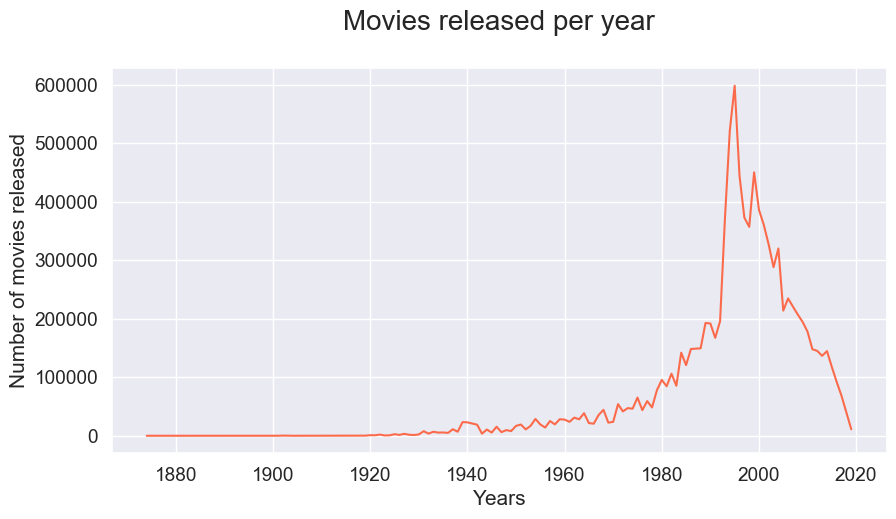

In [48]:
# Extract the release year fron the movie titles
ratings['release_year'] = ratings.title.map(lambda x: re.findall('\d\d\d\d', x))
ratings.release_year = ratings.release_year.apply(lambda x: np.nan if not x else int(x[-1]))
years =  pd.DataFrame(ratings.groupby(['release_year'])['title'].count())
years.rename(columns={'title':'movies released'}, inplace=True)

# Plot the number of movies released per year
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=years, dashes=False, legend=False, palette='Reds_r')

# Add figure labels
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of movies released', fontsize=15)
plt.title('Movies released per year\n', fontsize=20)

plt.show()

**Observations:**

This dataset contains movie ratings and movie specific data dating back 50 years.

There was a huge spike in movie production between 1990 and 2000 which has slowed down significantly in the last few years.

**Rating distribution: Shawshank Redemption**

Let's take a closer look at how the ratings for the most popular movie are distributed

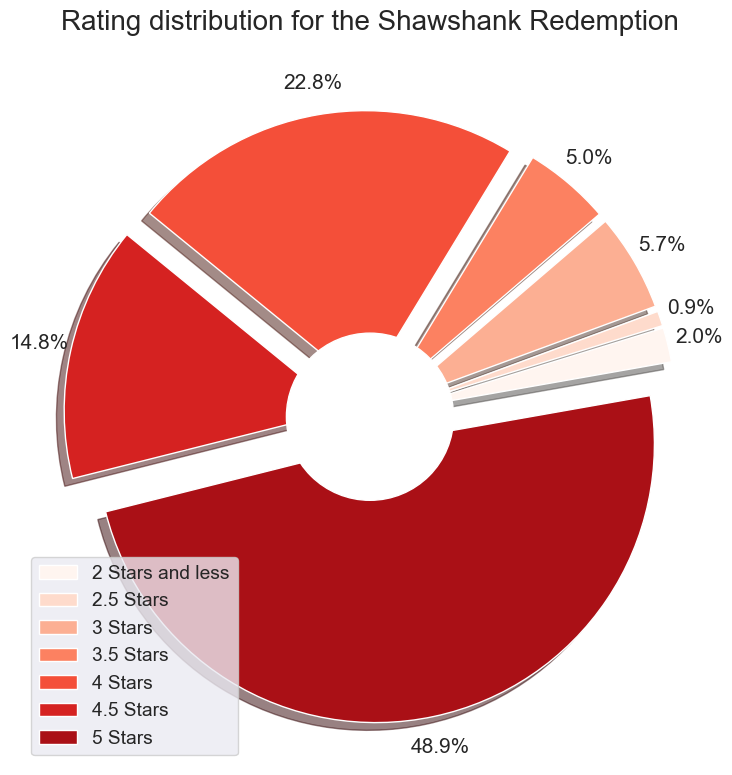

In [49]:
# Extract Shawshank Redemption ratings
top = ratings[ratings['title'] == 'Shawshank Redemption, The (1994)'].copy()

# Group all 2 star and lower ratings together
top.loc[(top.rating == 0.5) | (top.rating == 1) | (top.rating == 1.5), 'rating'] = 2

# Count how many ratings are in each category: 1 star, 2 star, etc.
grouped = pd.DataFrame(top.groupby('rating')['title'].count())
grouped.rename(columns={'title': 'rating_count'}, inplace=True)

# Create the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create the color palette
labels = ['2 Stars and less', '2.5 Stars', '3 Stars', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Reds')
ax.set_prop_cycle("color", [theme(1. * i / len(labels)) for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create the pie chart
explode = (0.1,) * len(grouped)
pie = ax.pie(grouped['rating_count'],
             autopct='%1.1f%%',
             shadow=True,
             startangle=10,
             pctdistance=1.115,
             explode=explode)

# Turn the pie chart into a donut chart
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig.gca().add_artist(centre_circle)

# Display the donut chart with a legend
ax.set_title('Rating distribution for the Shawshank Redemption\n', fontsize=20)
plt.legend(pie[0], labels, loc="lower left")
plt.tight_layout()
plt.show()

**Observations:**

48.9% of the ratings received were 5 stars

An impressive 86.4% of the ratings were between 5 and 4 stars

Only 2% of the ratings received were 2 stars or less

This was clearly a fan favourite

**3. Genres**
- How many different genres are represented in the dataset and how are they distributed?

In [50]:
#First lets create a corpus of all our plot keywords

plot_words = []

# Converting each keyword to lowercase and append them to our corpus
for keywords in imdb_data["plot_keywords"]:
    if isinstance(keywords, list):
        for word in keywords:
            cleaned_word = str(word).lower()  # Convert the keyword to lowercase
            plot_words.append(cleaned_word)

# Converting our list to a string
plot_words = " ".join(plot_words)

In [51]:
movies_genres = pd.DataFrame(movies[['movieId', 'genres']], columns=['movieId', 'genres'])

# Create expanded dataframe where each movie-genre combination is in a separate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


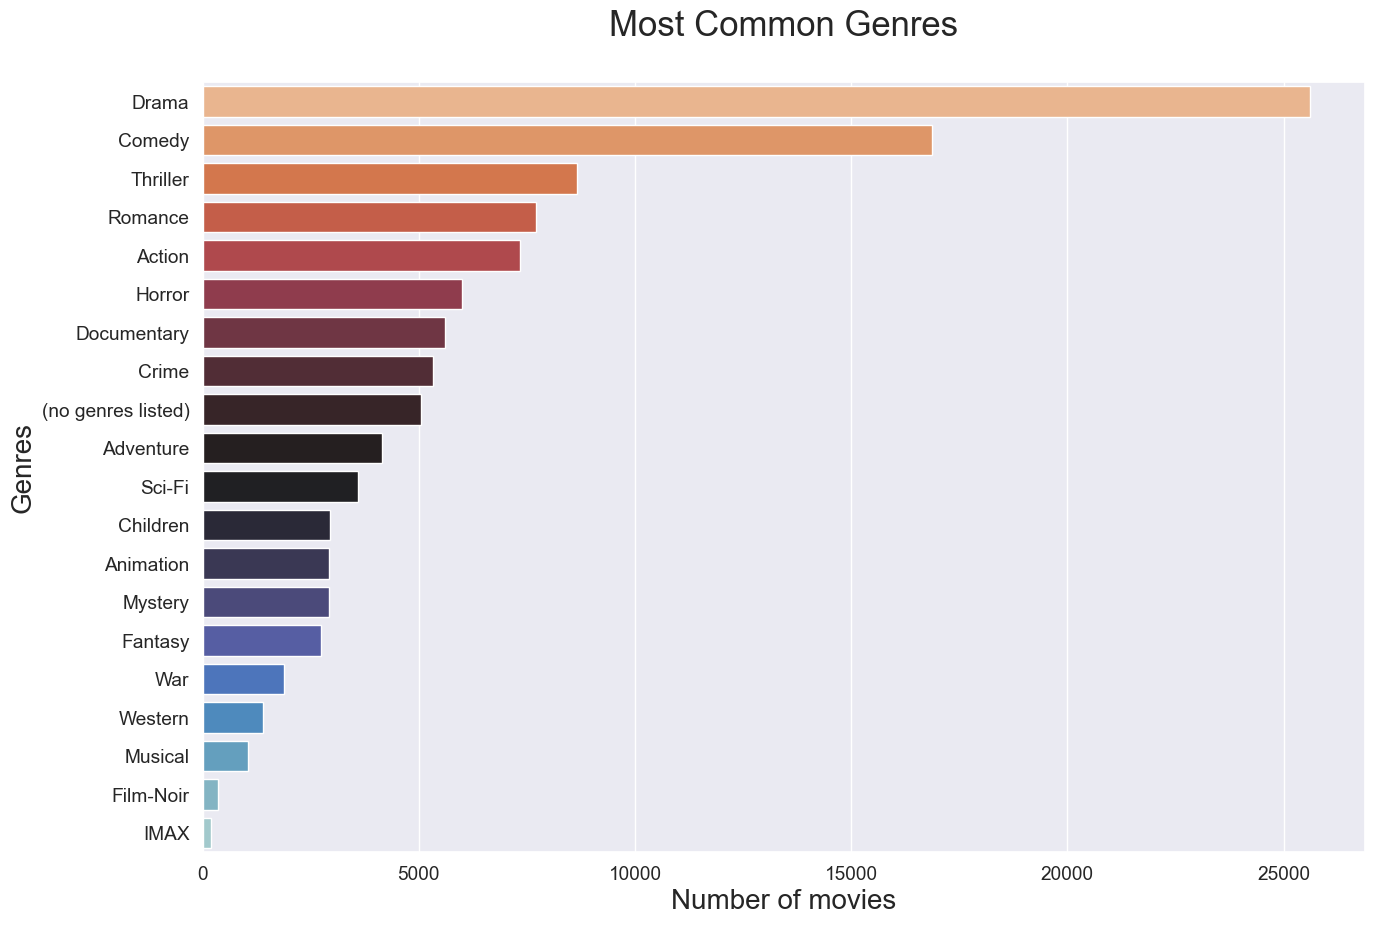

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
ax = sns.countplot(y="genres", data=movies_genres,
                   order=movies_genres['genres'].value_counts(ascending=False).index,
                   palette='icefire_r')

# Set title
plt.title('Most Common Genres\n', fontsize=25)

# Set axis titles and increase font size
ax.set_xlabel('Number of movies', fontsize=20)
ax.set_ylabel('Genres', fontsize=20)

plt.show()


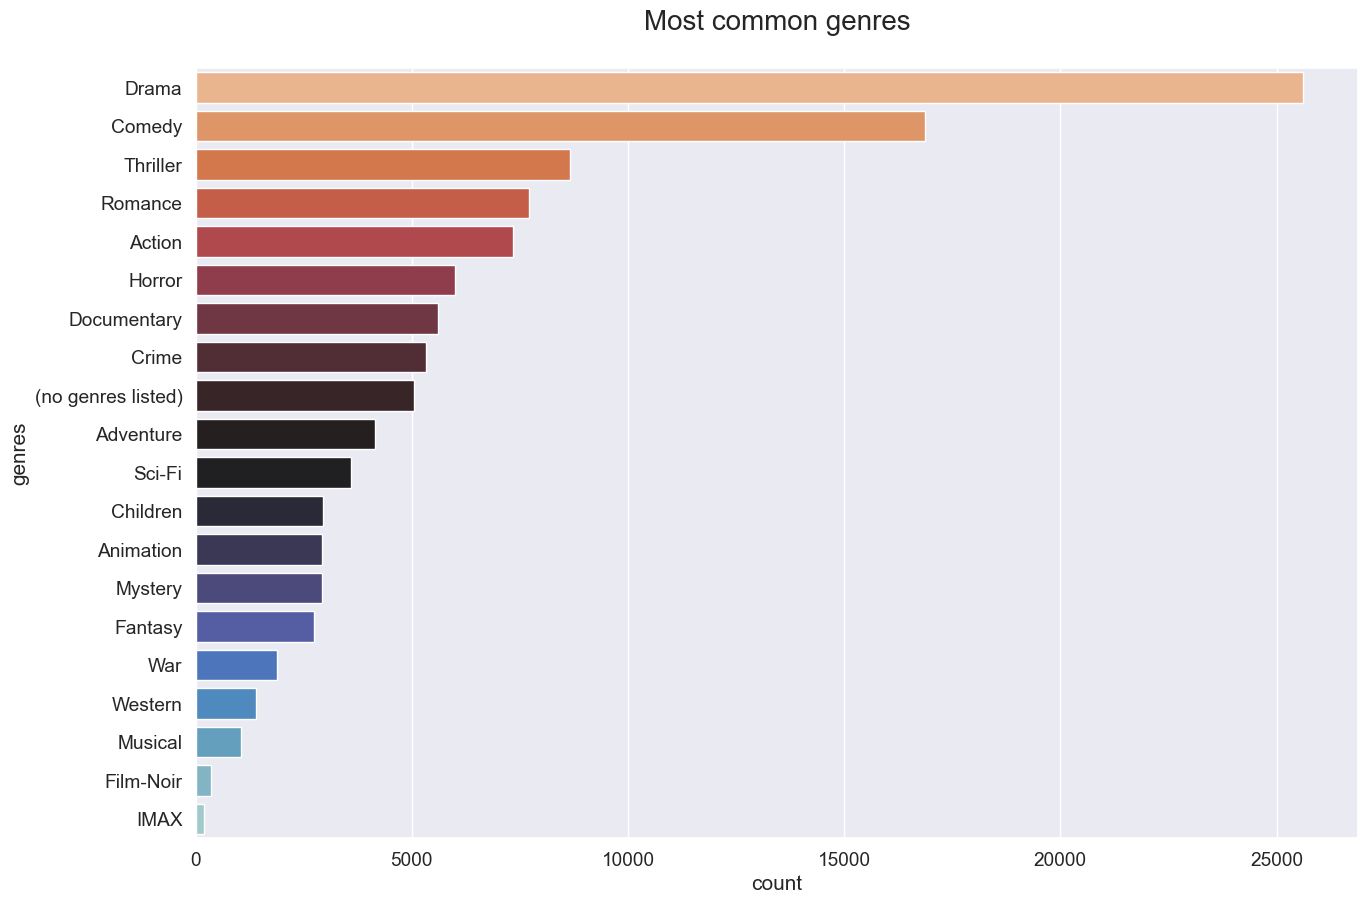

In [53]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='icefire_r')
plt.show()

**Observations:**

There are 19 unique genres

5062 films have no genre listed which accounts for 5% of the films in the dataset

Majority of the films fall into the drama, comedy and thriller genres.

Dramas account for 23%

Comedies makes up 15% of the films

8% of the films fall into the thriller genre

The Imax genre accounts for the smallest portion of the films in the dataset at less than 1% since this is a relatively new genre and the dataset goes back 50 years

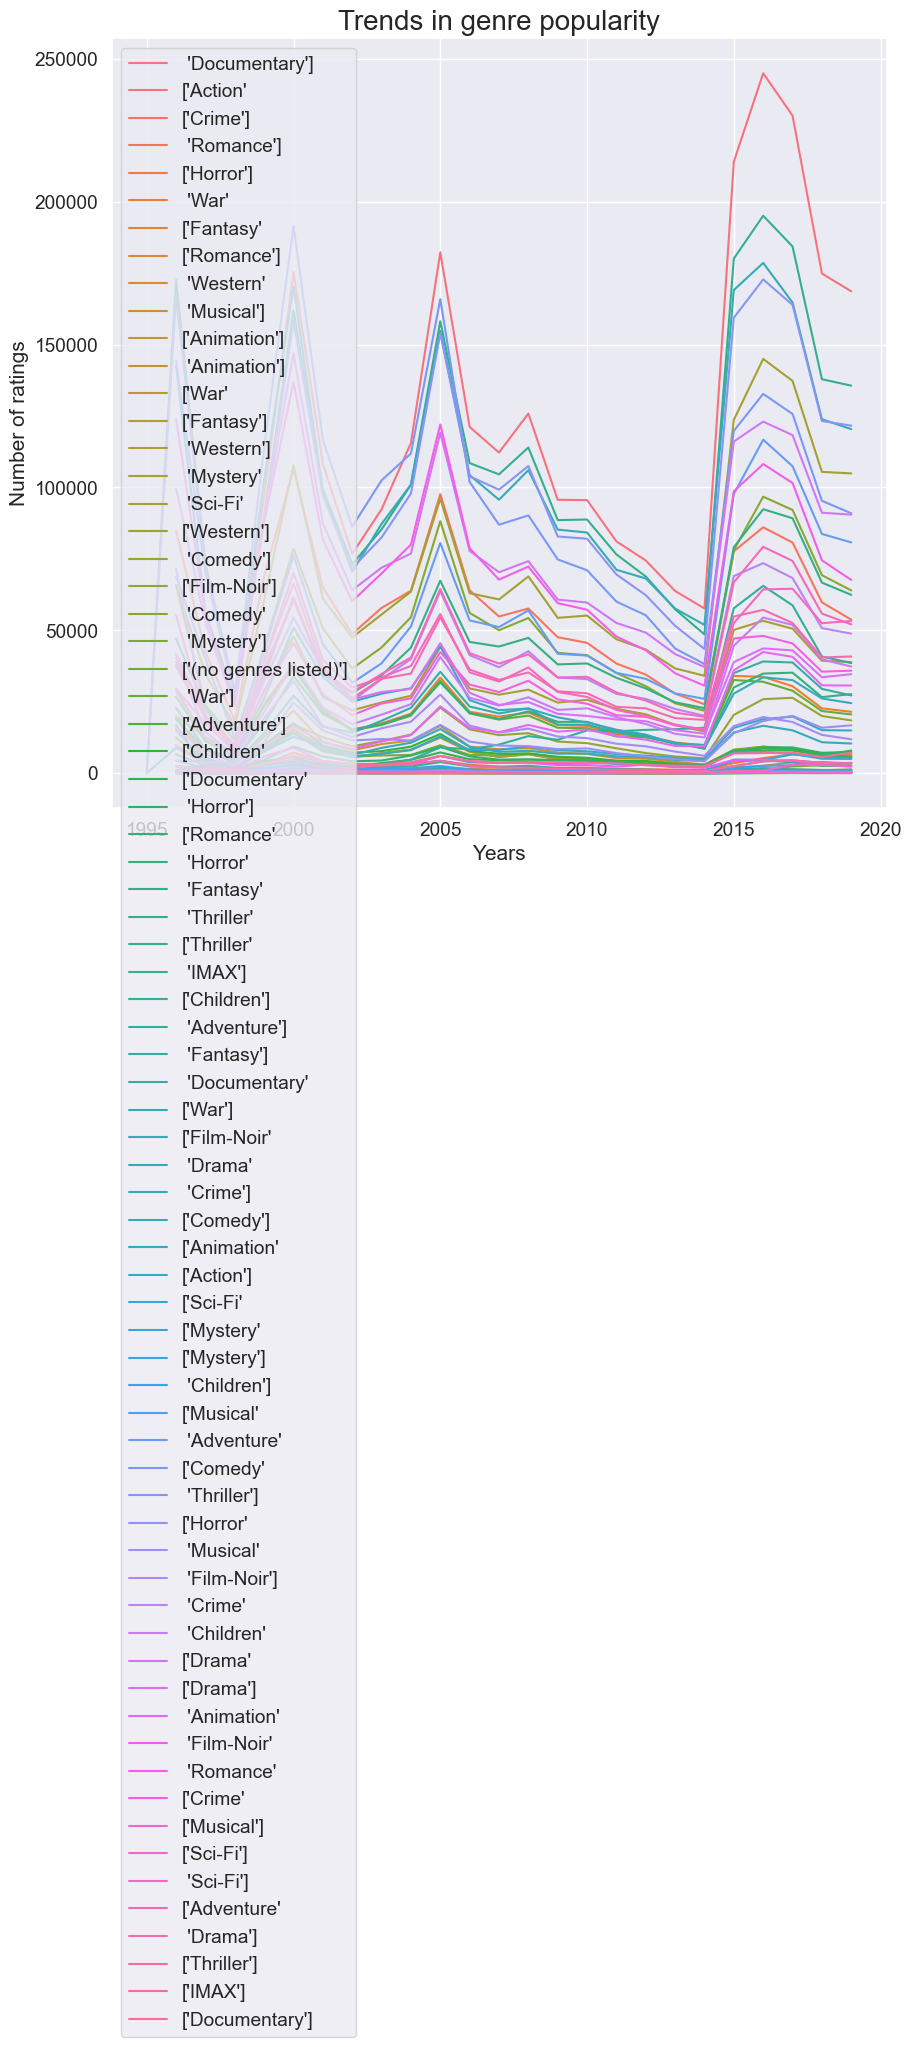

In [54]:
def most_watched(input_df):
    """"
    This function creates a plot showing the popularity of each genre
    over the last 50 years.

    Input: input_df
           datatype: DataFrame

    Output: None

    """
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(movies, on='movieId', how='left')

    # Create an empty dataframe
    b = pd.DataFrame()

    # Convert the 'genres' column to string format
    df['genres'] = df['genres'].apply(lambda x: str(x))

    # Extract the timestamps and genres
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|', ',') for genres in df.genres]).split(','))

    # Get the number of ratings for each genre for each year since 1970
    for index, genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i] / 31536000) + 1970) for i, x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b, pd.DataFrame({genre: a})], axis=1)

    # Plot the trends for each genre on the same line graph
    plt.figure(figsize=(10, 10))
    plot = sns.lineplot(data=b, dashes=False)

    # Add plot labels
    plt.title('Trends in genre popularity', fontsize=20)
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)

    plt.show()

# Assuming you have defined the 'movies' DataFrame and 'train' DataFrame
most_watched(train)


**Observations:**

We see a similar trend for most genres with a huge spike in 2015, this could be because of an increase in users and/or an increase in the number of movies released.

We also observe a sharp spike in 1996 in the number of movies rated in each genre followed by a huge dip in the following two years...Have to find the why.

It is also worth noting that the count of movie ratings has gone down across the boards in the last 5 years

**4. Cast**

I'm sure we all have certain actors we feel can do no wrong and we just love watching. The film cast will definitely have an influence on how much you enjoy or how highly you rate a movie. I for one love everything Taraji P. Henson touches.


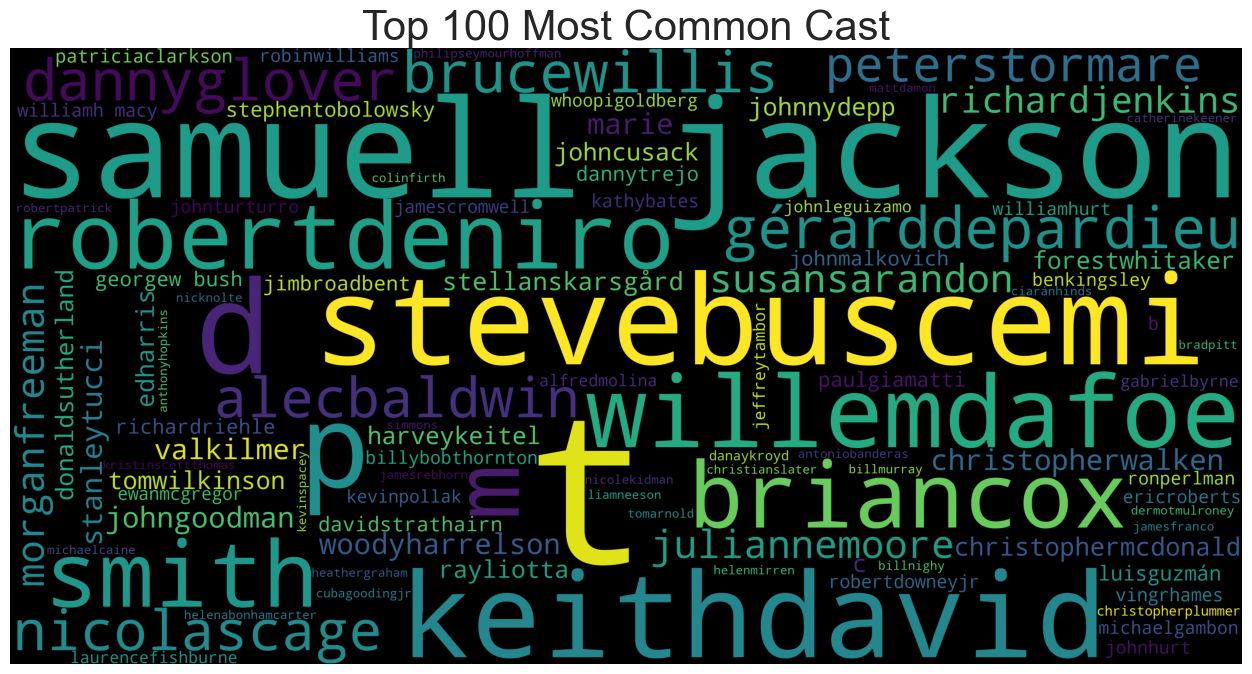

In [55]:
#First lets create a corpus of all our actors

actor_corpus = []

#We go through all our actors in the df_imdb column and if it isnt a None value, we convert it to lowercase and append it to
#our corpus
for title_cast in imdb_data["title_cast"]:
    if title_cast is not None:
        for cast in title_cast:
            actor_corpus.append(re.sub("\s+" , "", cast).lower())

#Converting our list to a string
actor_corpus = " ".join(actor_corpus)

#These are the stopwords we don't want to include in our word cloud
actor_stopwords = ['none', ' none', 'none ', 'nan', ' nan', 'nan ', 'j', ' j', 'j ', 'jean', ' jean', 'jean ', 'seefullsummary',\
                ' seefullsummary', 'seefullsummary '] + list(STOPWORDS)


#Creating our word cloud
title_wordcloud = WordCloud(stopwords=actor_stopwords, background_color='black', max_words=100,
                            height=2000, width=4000).generate(actor_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.title("Top 100 Most Common Cast", fontsize=30)
plt.axis('off')
plt.show()


**Observations:**

Tom Hanks: An American actor and filmmaker. Known for both his comedic and dramatic roles, Hanks is one of the most popular and recognizable film stars worldwide, and is widely regarded as an American cultural icon.

Ben Stiller: Throughout his career he has written, starred in, directed, or produced more than 50 films including The Secret Life of Walter Mitty, Zoolander, The Cable Guy and There's Something About Mary.

Eddie Murphy and Chris Rock are both successful comedians turned actors who have starred in numerous films throughout their careers

**5. Directors**



A film director controls a film's artistic and dramatic aspects and visualizes the screenplay while guiding the technical crew and actors in the fulfilment of that vision. The director has a key role in choosing the cast members, production design and all the creative aspects of filmmaking.

Let's have a closer look at the directors that appear frequently in our dataset. They must be doing something right.

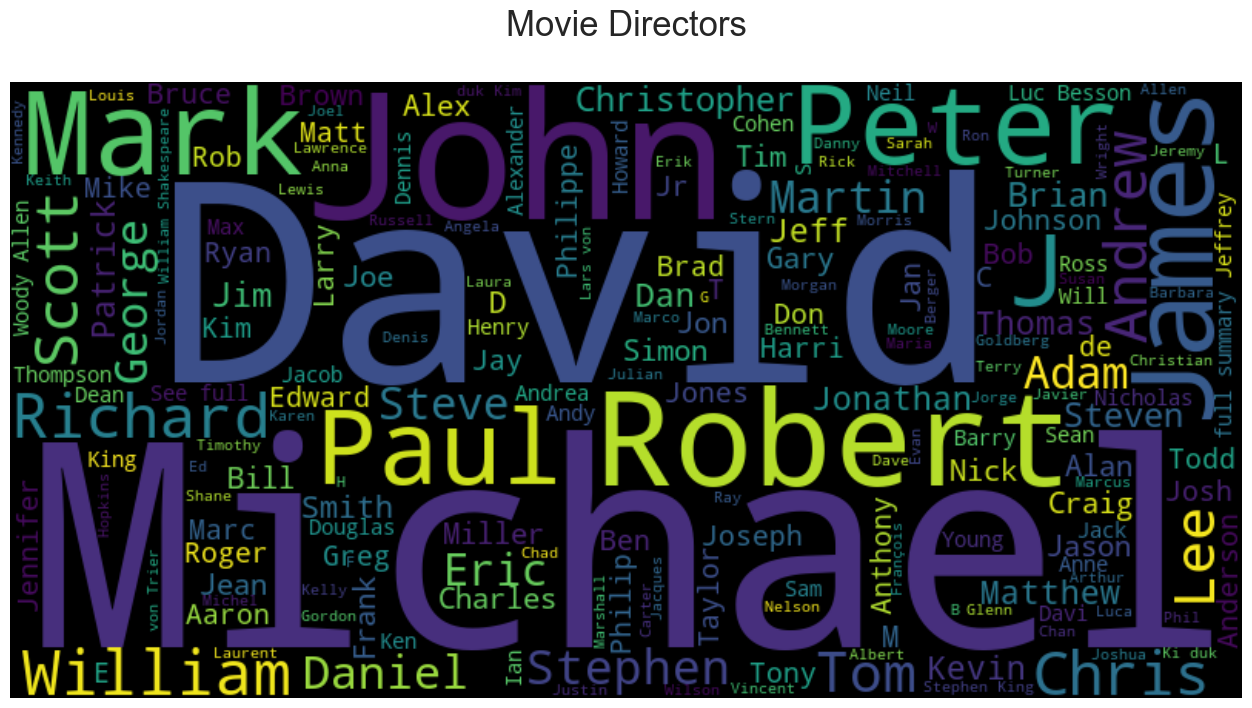

In [56]:
# Generate a WordCloud using the movie directors

# Concatenate all the directors' names into a single string
directors_text = ' '.join(imdb_data['director'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(directors_text)

# Plot the WordCloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Directors\n', fontsize=25)
plt.show()

**Observations:**

Our intuition was right, immediately we see some big names in the film industry jumping out at us

Stephen King and Shakespeare? Well.. It's more likely that these films were based on their work

Woody Allen is an American director, writer, actor, and comedian whose career spans more than six decades and multiple Academy Award-winning movies

Tyler Perry has directed some amazing films like Acrimony and the Madea films. He now has his own motion picture studio, 'Tyler Perry Studios'

Luc Paul Maurice Besson is a French film director, screenwriter, and producer. He directed or produced the films Subway, The Big Blue, and La Femme Nikita. Besson is associated with the Cinéma du look film movement

**6. Plotwords**

Lets have a look at the most frequently occuring plot keywords in the movielens dataset

In [57]:
#First lets create a corpus of all our plot keywords

plot_words = []

# Converting each keyword to lowercase and append them to our corpus
for keywords in imdb_data["plot_keywords"]:
    if isinstance(keywords, list):
        for word in keywords:
            cleaned_word = str(word).lower()  # Convert the keyword to lowercase
            plot_words.append(cleaned_word)

# Converting our list to a string
plot_words = " ".join(plot_words)

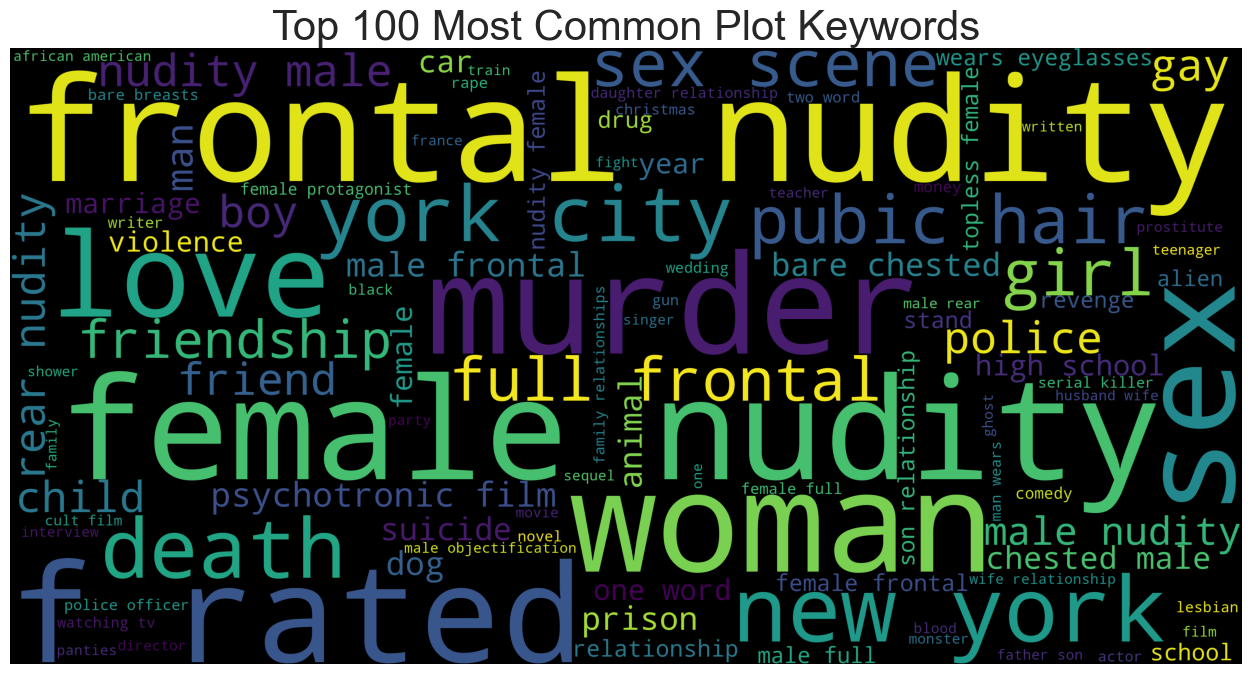

In [58]:
#Creating a list of our own stop words
plot_stopwords = ['character', 'title', 'reference', 'name', 'in', 'based', 'directed'] + list(STOPWORDS)

#Creating our word cloud
title_wordcloud = WordCloud(stopwords=plot_stopwords, background_color='black',
                            max_words=100, height=2000, width=4000).generate(plot_words)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.title("Top 100 Most Common Plot Keywords", fontsize=30)
plt.axis('off')
plt.show()

**Observations:**

Words that stand out occur more frequently in the dataset.

One of the words that stands out is F-rated which is a feminist classification system designed to highlight films that are written, directed or starring women

We see a few comedy related keywords like 'Comedy', 'stand up special', 'stand up comedy'

Documentary, biography and conspiracy are popular keywords.

Keywords like 'Seductive', 'hot', 'sexy', 'sex scene', ect are all over the wordcloud, this is because most films, regardless of the genre seem to have some element of sex appeal.

<a id="seven"></a>
## 7. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more movie recommender models that are able to accurately predict the thee hour load shortfall. |

---

Recommender systems are a type of artificial intelligence algorithm used to make personalized recommendations to users. These systems are commonly used in e-commerce, media, and other applications where it is important to surface relevant content to users.

There are several types of recommender systems, there are two types of recommendation systems we will be considering, namely:

Content-based filtering, which makes recommendations based on the characteristics of the items a user has liked in the past. Collaborative filtering, which makes recommendations based on the past behavior of users similar to the current user. The basic idea behind these systems is to use the historical data of users' interactions with a product or service, such as browsing history, purchase history, or ratings, to make recommendations. The system takes this data and compares it to other users' data to identify patterns and make predictions about what the current user might like.

Recommender systems can be used to suggest personalized products, content, or services to users based on their individual preferences and behavior. These systems can help increase customer satisfaction, reduce churn, and increase revenue.

It's worth noting that these systems also have a drawback, which is the potential to perpetuate bias or reinforce echo-chambers, as they are only able to make recommendations based on the data they've been trained on.

<a id="six.1"></a>
### 7.1 Content-Based Filtering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Content-based filtering is a method used in recommendation systems to recommend items to users based on the features or properties of the items themselves. It works by analyzing the content of the items and comparing them to the user's preferences or past behavior to identify similar items that the user might like.

For example, a movie recommendation system that uses content-based filtering would recommend movies to a user based on the genres, actors, and directors of the movies that the user has previously watched.

Our content-based filtering recommender system will take into account various features such as:

cast
director
genre
plot keywords

By focusing on just these four features, while our dataset may be smaller, the recommendation accuracy will be significantly improved.

**Preparing data for modelling**

In [59]:
# To have these attributes in one dataframe we merge the df_movies and df_imdb database

model_data = pd.merge(left=movies[["movieId","title","genres"]],right=\
                          imdb_data[["movieId","title_cast","director","plot_keywords"]],on='movieId')\
.apply(lambda x: x.astype(str))
model_data.head()

,movieId,title,genres,title_cast,director,plot_keywords
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"['toy', 'rivalry', 'cowboy', 'cgi animation']"
1,2,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Jonathan Hensleigh,"['board game', 'adventurer', 'fight', 'game']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']","['Walter Matthau', 'Jack Lemmon', 'Sophia Lore...",Mark Steven Johnson,"['boat', 'lake', 'neighbor', 'rivalry']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama', 'Romance']","['Whitney Houston', 'Angela Bassett', 'Loretta...",Terry McMillan,"['black american', 'husband wife relationship'..."
4,5,Father of the Bride Part II (1995),['Comedy'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Albert Hackett,"['fatherhood', 'doberman', 'dog', 'mansion']"


In [60]:
#defining a function that will remove the pipe symbols, and split the words

def split_words(string):
    if type(string) == str:
      return " ".join(string.split("|"))

In [61]:
model_data["genres"] = model_data["genres"].apply(split_words)
model_data["title_cast"] = model_data["title_cast"].apply(split_words)
model_data["plot_keywords"] = model_data["plot_keywords"].apply(split_words)

In [62]:
# combining our features in one column

model_data["combined_features"] = model_data["genres"] + " " + model_data["title_cast"] + " " + \
model_data["plot_keywords"] + " " + model_data["director"]
model_data.head(10)

,movieId,title,genres,title_cast,director,plot_keywords,combined_features
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"['toy', 'rivalry', 'cowboy', 'cgi animation']","['Adventure', 'Animation', 'Children', 'Comedy..."
1,2,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Jonathan Hensleigh,"['board game', 'adventurer', 'fight', 'game']","['Adventure', 'Children', 'Fantasy'] ['Robin W..."
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']","['Walter Matthau', 'Jack Lemmon', 'Sophia Lore...",Mark Steven Johnson,"['boat', 'lake', 'neighbor', 'rivalry']","['Comedy', 'Romance'] ['Walter Matthau', 'Jack..."
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama', 'Romance']","['Whitney Houston', 'Angela Bassett', 'Loretta...",Terry McMillan,"['black american', 'husband wife relationship'...","['Comedy', 'Drama', 'Romance'] ['Whitney Houst..."
4,5,Father of the Bride Part II (1995),['Comedy'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Albert Hackett,"['fatherhood', 'doberman', 'dog', 'mansion']","['Comedy'] ['Steve Martin', 'Diane Keaton', 'M..."
5,6,Heat (1995),"['Action', 'Crime', 'Thriller']","['Al Pacino', 'Robert De Niro', 'Val Kilmer', ...",Michael Mann,"['gun battle', 'organized crime', 'honor', 'cr...","['Action', 'Crime', 'Thriller'] ['Al Pacino', ..."
6,7,Sabrina (1995),"['Comedy', 'Romance']","['Harrison Ford', 'Julia Ormond', 'Greg Kinnea...",Samuel A. Taylor,"['character name as title', 'chauffeur', 'esta...","['Comedy', 'Romance'] ['Harrison Ford', 'Julia..."
7,8,Tom and Huck (1995),"['Adventure', 'Children']","['Jonathan Taylor Thomas', 'Brad Renfro', 'Eri...",Mark Twain,"['rescue from drowning', 'near drowning', 'cha...","['Adventure', 'Children'] ['Jonathan Taylor Th..."
8,9,Sudden Death (1995),['Action'],"['Jean-Claude Van Damme', 'Powers Boothe', 'Ra...",Karen Elise Baldwin,"['hockey', 'death in title', 'two word title',...","['Action'] ['Jean-Claude Van Damme', 'Powers B..."
9,10,GoldenEye (1995),"['Action', 'Adventure', 'Thriller']","['Pierce Brosnan', 'Sean Bean', 'Izabella Scor...",Ian Fleming,"['official james bond series', 'james bond cha...","['Action', 'Adventure', 'Thriller'] ['Pierce B..."


In [63]:
#Converting our movieId to an interger
model_data["movieId"] = model_data["movieId"].astype("int64")

CountVectorizer

In [64]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=3, stop_words='english')
count_matrix = count.fit_transform(model_data["combined_features"])

In [65]:
# To save space:
count_matrix = count_matrix.astype("float32")

In [66]:
#Now we create a similarity matrix between the vectors (movie information)
cosine_sim = cosine_similarity(count_matrix, count_matrix)

***Model***

In [67]:
df_model = pd.merge(model_data, links[["movieId"]], how = "left").reset_index()
df_model = df_model.drop("index", axis = 1)
df_model.head(3)

,movieId,title,genres,title_cast,director,plot_keywords,combined_features
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"['toy', 'rivalry', 'cowboy', 'cgi animation']","['Adventure', 'Animation', 'Children', 'Comedy..."
1,2,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Jonathan Hensleigh,"['board game', 'adventurer', 'fight', 'game']","['Adventure', 'Children', 'Fantasy'] ['Robin W..."
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']","['Walter Matthau', 'Jack Lemmon', 'Sophia Lore...",Mark Steven Johnson,"['boat', 'lake', 'neighbor', 'rivalry']","['Comedy', 'Romance'] ['Walter Matthau', 'Jack..."


In [68]:
def content_model(movie_list,top_n=10):

    """Performs Content filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Initializing the empty list of recommended movies
    recommended_movies = []
    indices = pd.Series(df_model['title'])

    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]

    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]

    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar movies
    listings = score_series_1.append(score_series_2).append(score_series_3).sort_values(ascending = False)

    # Store movie names
    recommended_movies = []

    # Appending the names of movies
    top_50_indexes = list(listings.iloc[1:50].index)

    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    for i in top_indexes[:top_n]:
        recommended_movies.append(list(df_model['title'])[i])

    titles = df_model[df_model["title"].isin(recommended_movies)]

    for i in titles["title"]:

   
        title = list(df_model[df_model["title"] == i]["title"])[0]


     

        print("Title: ", title)


In [69]:
#Lets try this the first 3 movies of our df_model dataframe
#Feel free to select your own movies from the df_model dataframe and set them equal to movie1, movie2 and movie3

import random
import requests
from PIL import Image
from io import BytesIO

# Assuming you have defined the 'df_model' DataFrame

movie1 = df_model["title"] [random.randint(0, 5000)]
movie2 = df_model["title"] [random.randint(5001, 15000)]
movie3 = df_model["title"] [random.randint(15001, 20000)]

print("Because you picked:\n")
print("1) ", movie1)
print("2) ", movie2)
print("3) ", movie3, "\n")

print("You may enjoy the following titles:")

# Assuming you have defined the 'content_model' function
content_model([movie1, movie2, movie3])



Because you picked:

1)  My Best Friend's Wedding (1997)
2)  .45 (2006)
3)  All I Desire (1953) 

You may enjoy the following titles:
Title:  Dangerous Liaisons (1988)
Title:  Sandpiper, The (1965)
Title:  All That Heaven Allows (1955)
Title:  Man of Iron (Czlowiek z Zelaza) (1981)
Title:  Cruel Romance, A (Zhestokij Romans) (1984)
Title:  One from the Heart (1982)
Title:  Patch of Blue, A (1965)
Title:  Lady Jane (1986)
Title:  Square Dance (1987)
Title:  Old San Francisco (1927)


<a id="seven.2"></a>
### 7.2 Collaborative Filtering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

What is Collaborative Filtering?

Collaborative filtering is a method of making recommendations by analyzing the preferences and behavior of similar users. It works by identifying a group of users whose tastes and preferences are similar to a particular user and using their past behavior to create a ranked list of suggestions.

In essence, it operates on the principle that individuals with similar tastes and preferences will have similar ratings for items. For example, if two users have a history of liking similar movies, it can be inferred that they may also enjoy other films that the other user has liked in the past.

Collaborative filtering offers several benefits, including:

Personalization: It considers the ratings and preferences of other users to make more relevant recommendations.

Ease of use: It does not require any detailed information about the items being recommended.

Adaptability: It can adapt to changes in a user's interests over time, making the recommendations more accurate.

How will we measure the accuracy of the ratings we calculate?

To measure the accuracy of the ratings we calculate, we will use the Root Mean Square Error (RMSE) method. This method involves predicting ratings for a test dataset of user-item pairs, where the true rating values are already known. The difference between the predicted and known values is calculated as the error. We will then square these error values, find their average, and take the square root of that average to determine the RMSE value.

Models Considered

In this project, we will explore the use of three matrix factorization models:

The Singular Value Decomposition (SVD) algorithm, which is a technique that reduces the number of features in a dataset by decomposing it into a product of matrices. This method is particularly useful for datasets where each row represents a user and each column represents a movie, and the matrix elements are ratings given by users to movies.

The Non-negative Matrix Factorization (NMF) algorithm, which is based on Principal Component Analysis (PCA) and is widely used for extracting sparse and significant features from high-dimensional non-negative data vectors.

The SlopeOne algorithm, a collaborative filtering approach that employs a simple linear regression model to address data sparsity and reduce overfitting, resulting in improved performance.

Technique:

We will make use of the Surprise Library. The "surprise" library is a Python library for building and analyzing recommender systems that is built on top of scikit-learn. It offers many built-in algorithms for collaborative filtering and other recommendation techniques, as well as utilities for evaluating the performance of a recommender system. It also provides a convenient wrapper for using scikit-learn's machine learning models with surprise's built-in datasets and evaluation tools.

7.2.1 Preparing the Modeling Data

For our Collaborative Filtering recommenders, we will be considering the following features:

userId, movieId and rating.

When we ran all the models with the whole data only SVD and Baseline ran others couldn't run.

In order to optimize the performance of our models, we will utilize a subset of our data, specifically 1% or 100,000 samples, during training.

In [70]:
# creating our subset data
df1 = df.head(100000)


In [71]:
dic={'itemID':list(train.movieId),
      'userID':list(train.userId),
      'rating':list(train.rating)}
df1= pd.DataFrame(dic)


In [72]:
## store train data into format required by suprise 
#Defining a reader to parse our dataframe containing ratings.

reader = Reader(rating_scale=(train['rating'].min(), train['rating'].max()))

data = Dataset.load_from_df(df1[['userID', 'itemID', 'rating']], reader)




In [73]:
'''

The following code iterates through the list of algorithms,
performs cross-validation on each one, and stores the results
in the benchmark list for further analysis.

'''

benchmark = []
for algorithm in [SVD(random_state=42), SlopeOne(), NMF(random_state=42) ,CoClustering(),BaselineOnly() ]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)

    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

We then choose SVD for the whole data

In [ ]:
reader = Reader(rating_scale=(train['rating'].min(), train['rating'].max()))

data2 = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)


SVD

In [ ]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data2, test_size=0.2, random_state=42)

# Create an SVD model
svd_model = SVD()

# Train the model on the training set
svd_model.fit(trainset)

# Make predictions on the test set
predictions = svd_model.test(testset)

# Evaluate the model's performance
rmse = accuracy.rmse(predictions)

# Display the RMSE
print(f"RMSE on the test set: {rmse}")

RMSE: 0.8333
RMSE on the test set: 0.833319969630373


**7.2.3 Final Model and Hyperparameter Tuning**

In [ ]:
# Test sample is made of 10% of the subset data
trainset, testset = train_test_split(data2, test_size=0.10, random_state=42)

Hyperparameter tuning is the process of systematically searching for the best combination of hyperparameters for a machine learning model. Hyperparameters are parameters that are not learned during training, but are set by the user before training begins.

In order to optimize the performance of our top-performing model, SVD, we conducted a thorough examination of various parameters. While a GridSearch is commonly used for hyperparameter tuning, the resources required exceeded the capacity of our equipment. As an alternative, we manually fine-tuned the parameters and discovered that the following values yielded the best results:

n_epochs: 50

n_factors: 400

init_std_dev: 0.001

random_state: 42.

In [ ]:
svd_test = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42)
svd_test.fit(trainset)
predictions = svd_test.test(testset)

# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.7896


In [ ]:

params = {'model_name': 'SVD', 
          'default_params': True}

metrics = {"rmse": accuracy.rmse(predictions)}
params = {'model_name': 'Baselineonly',
          'default_params': True}
metrics = {"rmse": accuracy.rmse(predictions)}

params = {'model_name': 'SlopeOne', 
          'default_params': True}
metrics = {"rmse": accuracy.rmse(predictions)}

params = {'model_name': 'NMF', 
          'default_params': True}
metrics = {"rmse": accuracy.rmse(predictions)}

params = {'model_name': 'CoClustering', 
          'default_params': True}
metrics = {"rmse": accuracy.rmse(predictions)}

metrics = {"rmse": accuracy.rmse(predictions)}
params = {'model_name': 'Baselineonly',
          'default_params': True}

params = {'model_name': 'svd_model',
          'default_params': True}
metrics = {"rmse": accuracy.rmse(predictions)}

params = {'model_name': 'svd_test',
          'default_params': True}
metrics = {"rmse": accuracy.rmse(predictions)}

params = {'model_name': 'svd_model',
          'default_params': True}
metrics = {"rmse": accuracy.rmse(predictions)}

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/gzukhanye-gmail-com/movie-prediction-system/af5145d14604469eb384149df7fbb9f3



RMSE: 0.7896
RMSE: 0.7896
RMSE: 0.7896
RMSE: 0.7896
RMSE: 0.7896
RMSE: 0.7896
RMSE: 0.7896
RMSE: 0.7896
RMSE: 0.7896
RMSE: 0.7896


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/gzukhanye-gmail-com/movie-prediction-system/af5145d14604469eb384149df7fbb9f3
COMET INFO:   Metrics:
COMET INFO:     rmse : 0.7895733794488065
COMET INFO:   Parameters:
COMET INFO:     default_params : True
COMET INFO:     model_name     : Baselineonly
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (12.31 MB)
COMET I

<a id="eight"></a>
## 8. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---


The Root Mean Square Error was used to evaluate the performance of the models. RMSE is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process.

**Root Mean Squared Error:**

$${RMSE} = \sqrt{\frac{1}{|\hat{R}|} \sum_{\hat{r}_{ui} \in\hat{R}}(r_{ui} - \hat{r}_{ui})^2}$$

In this equation $\hat{R}$ is the total number of recommendations generated for users and movies, with $r_{ui}$ and $\hat{r}_{ui}$ being the true and predicted ratings for user u watching movie i respectively.





In [ ]:
#Creating a dataframe of algorithm results and training time
results = pd.DataFrame(benchmark)
results["training_time"] = results["fit_time"] + results["test_time"]
results = results.drop(["fit_time", "test_time"], axis=1)

results

,test_rmse,Algorithm,training_time
0,0.978022,SVD,1.788919
1,1.160263,SlopeOne,2.634066
2,1.154341,NMF,5.798068
3,1.141217,CoClustering,7.373839
4,0.980263,BaselineOnly,0.851167


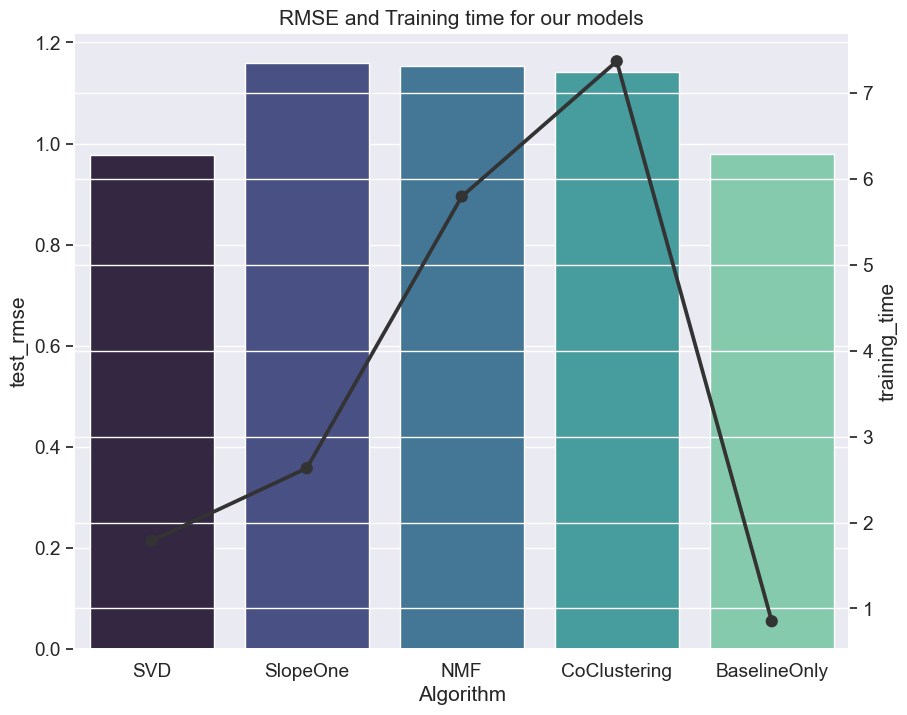

In [ ]:
x_ ="Algorithm"
y_ = "test_rmse"
y_2 = "training_time"


plt.figure(figsize=(10, 8))
ax = sns.barplot(x=x_, y=y_, data=results, palette='mako')

ax2 = ax.twinx()

g2 = sns.pointplot(x=x_, y=y_2, data=results, ax=ax2, color='0.2')
plt.title("RMSE and Training time for our models")
plt.show()

The models of sampled data did not perform good compared to the models of the whole data. SVD and baseline performed better compared to other models with RMSE of 0.98 and 0.99 respectively. When we looked models for the whole data SVD performed better with RMSE of 0.83.

After hyperparater tuning the RMSE improved to 0.789 on Kaggle. The SVD models were fitted on all the data to ensure that as many users and items are included in the "library", if this is not done the model uses biased averages to estimate ratings for items and users not used in training the model. If biased averages are used the ratings will not be personalised to user preferences.

<a id="eight"></a>
## 9. Conclusions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The primary objective of this project was to develop an effective recommender system capable of providing tailored suggestions to users based on their preferences and behaviors.We successfully completed of data preprocessing, feature engineering, EDA and modelling. The dataset, comprising nulls and  pipe symbols, underwent thorough cleaning and transformation for building a robust recommendation engine.

Our modeling approach involved the content based algorithm and collaborative algoriths. The evaluation metrics, including RMSE, indicate the system's proficiency in generating relevant and precise recommendations. We selected the SVD model which we hypertuned to get a RMSE score 0,78.However this model still requires improvements. As a recommendation for further studies more features can be added to training data (e.g. directors, runtime, gnome scores and tags, genres, etc). Dimensionality reduction techniques such as PCA, tSNE (t-distributed Stochastic Neighbour Embedding), and MDS (Multi-dimensional Scaling) can be employed. Hyperparameter tuning can also be done. Hybrid systems which combine both content based and collaborative models can be explored. Becuase of the large dataset, more advanced machine learning techniques such as Deep Learning can be considered.


